In [5]:
import numpy as np
import matplotlib.pyplot as plt
import fluids as fl
from pint import _DEFAULT_REGISTRY as u

In [6]:
def variablesFunc():
    #Input Variables, Units are Assigned
    massFlow = 2*(u.kilogram/u.second) #see if can handle 2
    density = 1100*(u.kilogram/u.meter**3)
    viscosity = 0.00016*(u.pascal*u.second)
    roughness = 0.00001*(u.meter)
    minDiam = 0.00635*(u.meter)
    maxDiam = 0.127*(u.meter)
    diamStep = 0.000254*(u.meter)
    diamRange = (np.arange(minDiam.magnitude, maxDiam.magnitude, diamStep.magnitude))*(u.meter)
    straightLength = float(5)*u.meter
    
    #Calculated Variables
    areaRange = np.square(diamRange / (2*u.dimensionless)) * np.pi*(u.dimensionless)
    velocityRange = np.divide((massFlow), (areaRange * density))

    #Creating Empty Arrays For Variable Ranges
    reynoldsRange = np.empty(len(diamRange))
    frictionFactorRange = np.empty(len(diamRange))
    kFactorRange = np.empty(len(diamRange))
    pressureDropRange = np.empty(len(diamRange))

    #Iterating Through Diameters, Calculating Variable Ranges
    for i in np.arange(0, len(diamRange), 1):
        reynoldsRange[i] = fl.units.Reynolds(V=velocityRange[i], mu = viscosity, rho = density, D = diamRange[i])
        frictionFactorRange[i] = fl.units.friction_factor(Re = reynoldsRange[i], eD = np.divide(roughness,diamRange[i]), Darcy = True)
        kFactorRange[i] = fl.units.K_from_f(fd = frictionFactorRange[i], L = straightLength, D = diamRange[i])
        pressureDrop = fl.units.dP_from_K(K = kFactorRange[i], rho = density, V = velocityRange[i]) #Variable to temporarily store pressure drop

        pressureDropRange[i] = pressureDrop.magnitude #Array collects all pressure drop values
        
    pressureDropRange = pressureDropRange * pressureDrop.units #Unit is taken from the last pressure drop value and added here (done bc you can't add pint quantities to np arrays)

    #Plots Diameter Against Pressure Drop
    fig, ax = plt.subplots()
    varPlot = ax.plot(diamRange.to("inch"), pressureDropRange.to("psi"))
    ax.grid(visible = True)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.set_xlabel("Diameter (Inches)")
    ax.set_ylabel("Pressure Drop (psi)")
    plt.show()

    return density, velocityRange, diamRange, straightLength, frictionFactorRange, pressureDropRange

c:\Users\goose\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


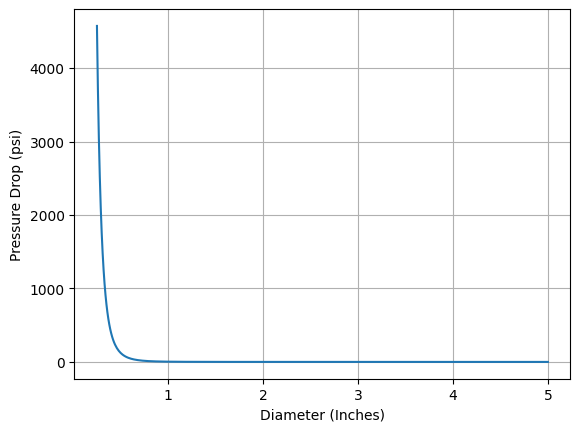

(1100 <Unit('kilogram / meter ** 3')>,
 array([57.41164339, 53.08029159, 49.22123061, 45.76821061, 42.66620347,
        39.8691968 , 37.33847775, 35.04128625, 32.94974942, 31.04003211,
        29.29165479, 27.68694222, 26.21057496, 24.84922238, 23.59124071,
        22.4264232 , 21.34579245, 20.34142694, 19.40631537, 18.53423405,
        17.71964302, 16.95759788, 16.24367457, 15.573905  , 14.94472183,
        14.35291085, 13.79556983, 13.2700729 , 12.77403956, 12.30530765,
        11.86190979, 11.44205265, 11.04409884, 10.66655087, 10.30803709,
         9.9672992 ,  9.64318117,  9.33461944,  9.04063419,  8.76032156,
         8.49284665,  8.23743735,  7.99337873,  7.76000803,  7.53671017,
         7.3229137 ,  7.11808711,  6.92173555,  6.73339785,  6.55264374,
         6.37907149,  6.21230559,  6.05199479,  5.89781018,  5.74944354,
         5.6066058 ,  5.46902562,  5.33644811,  5.20863364,  5.08535673,
         4.96640514,  4.85157884,  4.74068927,  4.63355851,  4.53001857,
         4.4

In [7]:
variablesFunc()


In [8]:
#ALL DEBUGGING
#PROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELL
testPDrop = fl.units.dP_from_K(K = 1.0, rho = 1.0*(u.kilogram / u.meter **3), V = 1.0*(u.meter / u.second))
print(testPDrop)

a = [1, 2, 3]
b = 1 * (u.kilogram / u.meter **3)
c = [1, 2, 3] * (u.meter / u.second)
AHH = np.empty(1)

A = 1 * u.meter
B = 2 * u.meter

bruh = np.empty(1)

bruh = [A, B]
print(bruh)

AHHRange = np.empty(len(a))

for i in np.arange(0, len(a), 1):
    AHH = fl.units.dP_from_K(K = a[i], rho = b, V = c[i])
    AHHRange[i] = AHH.magnitude

print(AHHRange * AHH.units)

0.5 pascal
[<Quantity(1, 'meter')>, <Quantity(2, 'meter')>]
[0.5 4.0 13.5] pascal
